# Compile and run 

Using data computed on Server

# Energy

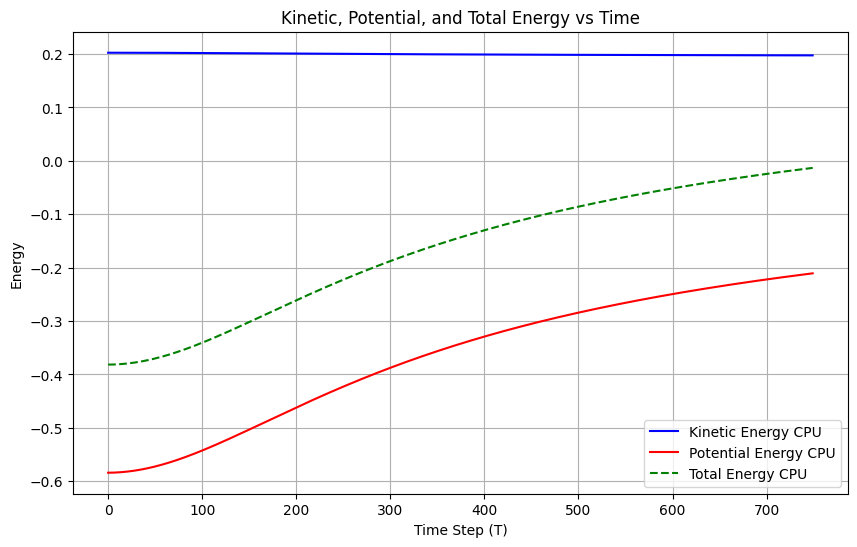

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the file
data = np.loadtxt('out_data/energy.dat')
potential_energy = data[:, 0]
kinetic_energy = data[:, 1]
total_energy = kinetic_energy + potential_energy
plt.figure(figsize=(10, 6))
plt.plot(kinetic_energy, label='Kinetic Energy CPU', color='blue')
plt.plot(potential_energy, label='Potential Energy CPU', color='red')
plt.plot(total_energy, label='Total Energy CPU', color='green', linestyle='--')
plt.xlabel('Time Step (T)')
plt.ylabel('Energy')
plt.title('Kinetic, Potential, and Total Energy vs Time')







# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
